# Import library

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Import dataset from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Load model

In [ ]:
# load saved model and try predictions

# load CT model
CT_model = tf.keras.models.load_model('/content/gdrive/Shareddrives/Soedirman-Machine-Learning/CT SCAN COVID-19/Model/model_CT.h5')
CT_model.layers[0].input_shape

# load risk model
risk_model = tf.keras.models.load_model('/content/gdrive/Shareddrives/Soedirman-Machine-Learning/CT SCAN COVID-19/Model/risk.h5')
risk_model.layers[0].input_shape

# load mortality model
mor_model = tf.keras.models.load_model('/content/gdrive/Shareddrives/Soedirman-Machine-Learning/CT SCAN COVID-19/Model/mor.h5')
mor_model.layers[0].input_shape

# load covid positivity model
CP_model = tf.keras.models.load_model('/content/gdrive/Shareddrives/Soedirman-Machine-Learning/CT SCAN COVID-19/Model/CP.h5')
CP_model.layers[0].input_shape



(None, 224, 224, 3)

# Use model to predict image

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Lung Parenchyma Predicted class: pCT
Nilai probabilitasnya adalah: [[0.0000000e+00 1.5534836e-12 1.0000000e+00]]
Covid Positivity Predicted class: Positive
Nilai probabilitasnya adalah: [[8.3221983e-07 9.9999917e-01]]
Risk Predicted class: Control
Nilai probabilitasnya adalah: [[1. 0. 0.]]
Mortality Predicted class: Unknown
Nilai probabilitasnya adalah: [[5.4329775e-27 0.0000000e+00 1.0000000e+00]]


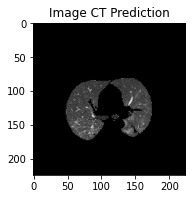

In [ ]:
# image prediction
img1 = os.path.join('/content/gdrive/Shareddrives/Soedirman-Machine-Learning/CT SCAN COVID-19/CT/Pre-processed/pCT/pCT106.jpg' )


img_CT = load_img(img1, target_size=(224, 224))
x = img_to_array(img_CT)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])


# Perform prediction

# Predict image CT 
classes_LP = ["NiCT", "nCT", "pCT"]
predictions_LP = CT_model.predict_classes(images, batch_size=10)
prob_LP = CT_model.predict_proba(images)

classes_CP = ["Negative", "Positive"]
predictions_CP = CP_model.predict_classes(images, batch_size=10)
prob_CP = CP_model.predict_proba(images)

classes_mor = ["Cured", "Deceased", "Unknown"]
predictions_mor = mor_model.predict_classes(images, batch_size=10)
prob_mor = mor_model.predict_proba(images)

classes_risk = ["Control", "Type I", "Type II"]
predictions_risk = risk_model.predict_classes(images, batch_size=10)
prob_risk = risk_model.predict_proba(images)

# display image and prediction
plt.figure()
plt.subplot(121)
plt.title("Image CT Prediction") 
plt.imshow(img_CT)

if predictions_LP == 2 and predictions_CP == 1:
  print("Lung Parenchyma Predicted class: " + str(classes_LP[predictions_LP[0]]))
  print("Nilai probabilitasnya adalah:",prob_LP)
  print("Covid Positivity Predicted class: " + str(classes_CP[predictions_CP[0]]))
  print("Nilai probabilitasnya adalah:",prob_CP)
  print("Risk Predicted class: " + str(classes_risk[predictions_risk[0]]))
  print("Nilai probabilitasnya adalah:",prob_risk)
  print("Mortality Predicted class: " + str(classes_mor[predictions_mor[0]]))
  print("Nilai probabilitasnya adalah:",prob_mor)
elif predictions_LP == 2 and predictions_CP == 0:
  print("Lung Parenchyma Predicted class: " + str(classes_LP[predictions_LP[0]]))
  print("Nilai probabilitasnya adalah:",prob_LP)
  print("Covid Positivity Predicted class: " + str(classes_CP[predictions_CP[0]]))
  print("Nilai probabilitasnya adalah:",prob_CP)
elif predictions_LP == 0 or predictions_LP == 1:
  print("Lung Parenchyma Predicted class: " + str(classes_LP[predictions_LP[0]]))
  print("Nilai probabilitasnya adalah:",prob_LP)
return images
